# House Prices
Data is aquired from a competition on Kaggle. https://www.kaggle.com/c/house-prices-advanced-regression-techniques
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges competitors to predict the final price of each home.

## Questions for myself:


- Can you find some trends (high, low, increase, decrease, anomalies)?

- Can you make a bar plot or a histogram?

- Can you compare two related quantities?

- Can you make a scatterplot?

- Can you make a time-series plot?

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pprint
import scipy.stats as stats
import seaborn as sns
%matplotlib inline

df = pd.read_csv('train.csv')
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### 1. Some trends?
- The distribution of the sale price of houses in Boston seems to follow a normal distribution with positive skew.


Text(0.5,1,'Sale Price Distribution')

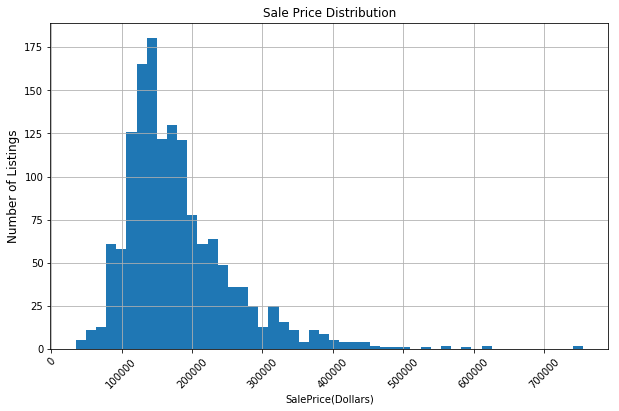

In [7]:
fig = plt.figure(figsize=(10,6))
ax = df['SalePrice'].hist(bins=50)
# ax.set_ylabel('Number of Passengers')
plt.xticks(rotation=45,fontsize=10)
ax.set_xlabel('SalePrice(Dollars)',fontsize=10)
ax.set_ylabel('Number of Listings',fontsize=12)
ax.set_title('Sale Price Distribution',fontsize=12)

### 2. A histogram. 
- Already made on top of this cell.

### 3. Compare two related quantites: Garage Area VS Lot Area (with time-series scatter plot)
- Over 100 years since 1900, the mean LOT AREA of houses in Boston is not chaning much. At the same time, the GarageArea is obviously increasing significantly, especially after 1950. This makes sense because houes owned vihecles were getting more and more popular over the years. What makes us wondering is, when the total LotArea stays the same and GarageArea keeps growing, the area left for people to live in their house is yielding to the need of cars.

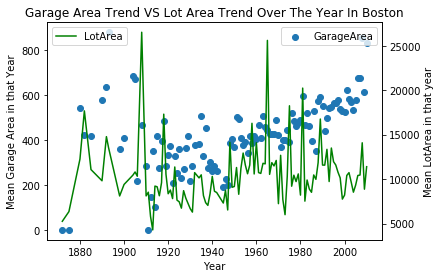

In [32]:
size=df.groupby(['YearBuilt']).GarageArea.count()
plt.scatter(df.groupby(['YearBuilt']).GarageArea.mean().index,df.groupby(['YearBuilt']).GarageArea.mean())
plt.xlabel('Year')
plt.ylabel('Mean Garage Area in that Year')
plt.title('Garage Area Trend VS Lot Area Trend Over The Year In Boston')
plt.legend(loc=1)
plt2 = plt.twinx()
plt.plot(df.groupby(['YearBuilt']).GarageArea.mean().index,df.groupby(['YearBuilt']).LotArea.mean(),color='g')
plt.ylabel('Mean LotArea in that year')
plt.legend(loc=2)

### Conclusion:
Over 100 years since 1900, the Lot Area of houses in Boston is not chaning much. At the same time, the GarageArea is obviously increasing significantly, especially after 1950. This makes sense because houes owned vihecles were getting more and more popular over the years. What makes us wondering is, when the total LotArea stays the same and GarageArea keeps growing, the area left for people to live in their house is yielding to the need of cars.